# Imports & Variables

In [7]:
import os
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt 
import random 
import tensorflow as tf

maps_paths = ['/content/drive/MyDrive/Maps1_6_T/Maps1_T/', '/content/drive/MyDrive/Maps1_6_T/Maps2_T/', '/content/drive/MyDrive/Maps1_6_T/Maps3_T/', '/content/drive/MyDrive/Maps1_6_T/Maps4_T/', '/content/drive/MyDrive/Maps1_6_T/Maps5_T/', '/content/drive/MyDrive/Maps1_6_T/Maps6_T/']
train_path = '/content/drive/MyDrive/Train Imgs'

def get_map_filename(filename, n):
    # given a filename of a image returns the map filename in the Nth folder
    target_filename = filename[:-4] + f"_MAP{n+1}.png"
    return target_filename


# Rename images
- maps: slideXXX_coreYYY_classimg_nonconvex.png --> sXXX_cYYY_MAPn.png
- train images: slideXXX_coreYYY.jpeg --> sXXX_cYYY.png

In [ ]:
# handles maps 
for i in range(len(maps_paths)):
    for filename in os.listdir(maps_paths[i]):
        if filename.endswith('.png'):
            old_path = os.path.join(maps_paths[i], filename)
            new_filename = f's{filename[5:8]}_c{filename[13:16]}_MAP{i+1}.png' # added _MAP{i+1} can break stuff below
            new_path = os.path.join(maps_paths[i], new_filename)
            os.rename(old_path, new_path)

# hadles train imgs
for filename in os.listdir(train_path):
    if filename.endswith('.jpg'):
        old_path = os.path.join(train_path, filename)
        new_filename = f's{filename[5:8]}_c{filename[13:16]}.png'
        new_path = os.path.join(train_path, new_filename)
        os.rename(old_path, new_path)

# Exploring the dataset

## Check maps size in every map_dir

In [ ]:
# create list of shapes for every map_N

maps_sizedata = []
for dir in maps_paths:
    print(dir)
    mapn = []
    for filename in os.listdir(dir):
        if filename.endswith('.png'):
            # Load the PNG image using PIL
            image = Image.open(dir+filename)
            # Convert the PIL image to a NumPy array
            array = np.array(image)

            mapn.append(str(array.shape[0])+"x"+str(array.shape[1]))
    maps_sizedata.append(mapn)

# count occurrences for every shape in every mapN

maps_dicts = []

for mapn in maps_sizedata:
    mapn_dict = Counter(mapn)
    maps_dicts.append(mapn_dict)

/content/drive/MyDrive/Maps1_6_T/Maps1_T/
/content/drive/MyDrive/Maps1_6_T/Maps2_T/
/content/drive/MyDrive/Maps1_6_T/Maps3_T/
/content/drive/MyDrive/Maps1_6_T/Maps4_T/
/content/drive/MyDrive/Maps1_6_T/Maps5_T/
/content/drive/MyDrive/Maps1_6_T/Maps6_T/


### Display results

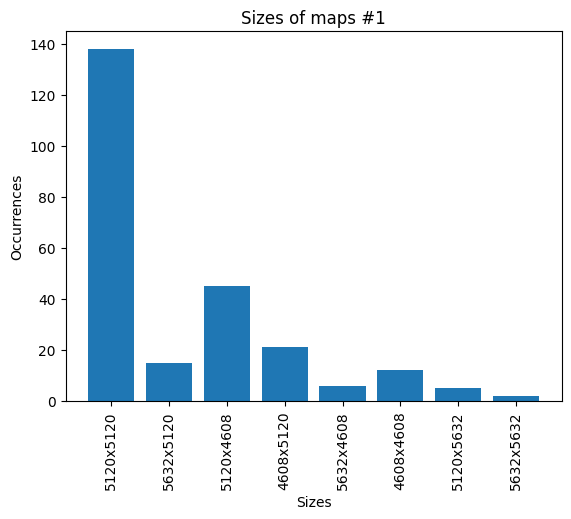

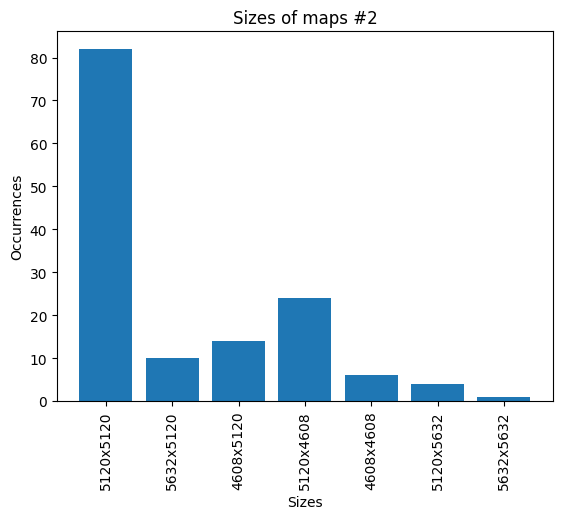

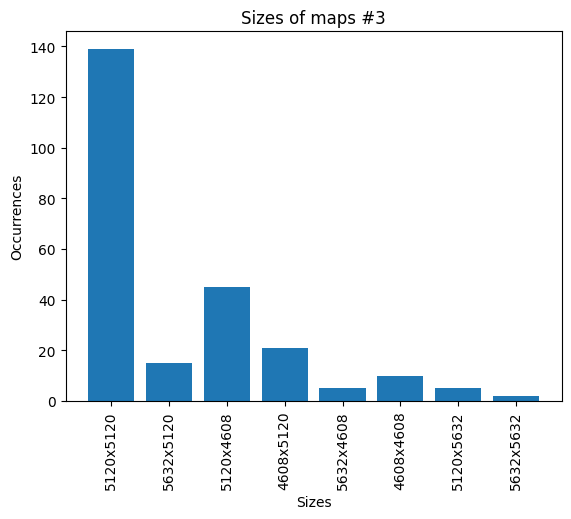

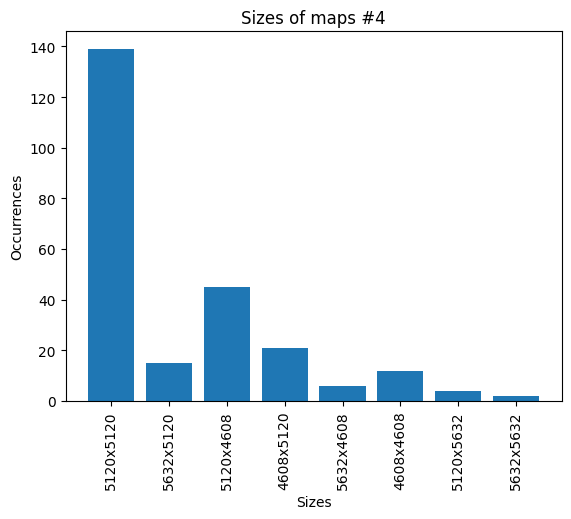

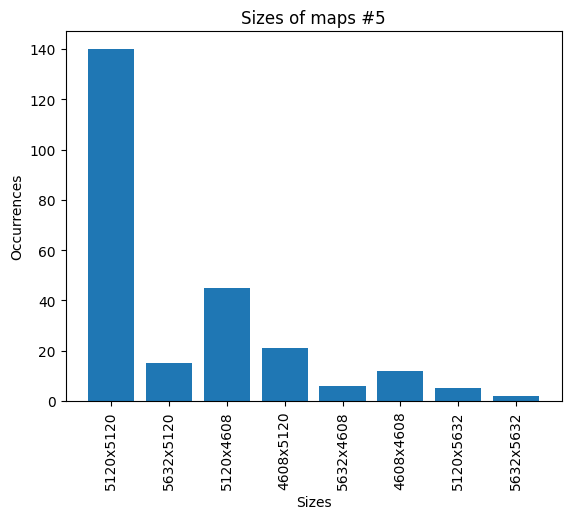

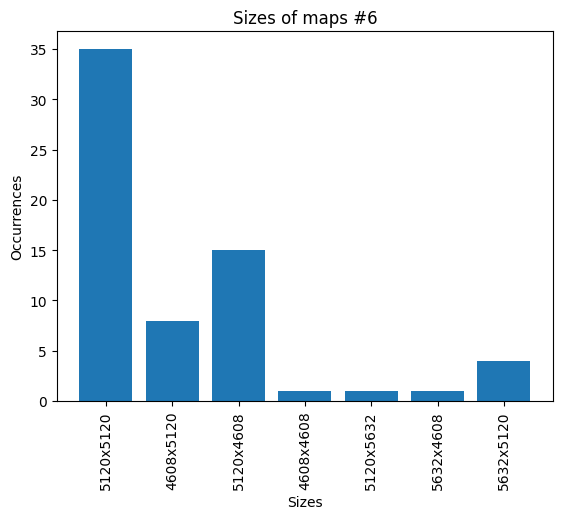

In [ ]:
# plot results

for i in range(len(maps_dicts)):
    plt.bar(maps_dicts[i].keys(), maps_dicts[i].values())

    # formatting graph
    title = "Sizes of maps #" + str(i+1)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel("Occurrences")
    plt.xlabel("Sizes")
    plt.show()
  

## Checking if there is a size mismatch between train_img and the corresponding map in the dataset

In [ ]:
 
#     check if image exists in mapN (check if images has at least 1 map)
#     if it does, check if sizes match


for filename in os.listdir(train_path):

    # Load the PNG image using PIL
    train_image = Image.open(os.path.join(train_path, filename))
    # Convert the PIL image to a NumPy array
    train_array = np.array(train_image)

    hasMap = False
    if filename.endswith('.png'):
        for dir in maps_paths:
            if os.path.isfile(os.path.join(dir, filename)):
                hasMap = True

                map_image = Image.open(os.path.join(dir, filename))
                map_array = np.array(map_image)

                if map_array.shape != train_array.shape[0:2]:
                    print(map_array.shape)
                    print(train_array.shape[0:2])
                    print('------')
                    print("Shape mismatch!")

        if not hasMap:
          print(f"{filename} has no maps!")


## What happens in Map5!
- there are more maps than train_imgs (246 > 244)
- what if the problem is not only in Map5?
- there would be map_imgs not connected with train_imgs

### Maps: **s007_c137 and s007_c145** do not have their respective images!
- Let's exclude them from the dataset

In [ ]:
map5_path = maps_paths[4]

for filename in os.listdir(map5_path):
    if not os.path.isfile(os.path.join(train_path, filename)):
        print(f"{filename} does not appear in train_path")

s007_c137.png does not appear in train_path
s007_c145.png does not appear in train_path


In [ ]:
for dir in maps_paths:
    for filename in os.listdir(dir):
        if not os.path.isfile(os.path.join(train_path, filename)):
          print(f"In Map: {dir} found image: {filename} which do not appear in train_path")

In Map: /content/Maps1_T/Maps1_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps1_T/Maps1_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps2_T/Maps2_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps2_T/Maps2_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps3_T/Maps3_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps3_T/Maps3_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps4_T/Maps4_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps4_T/Maps4_T/ found image: s006_c137.png which do not appear in train_path
In Map: /content/Maps4_T/Maps4_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps5_T/Maps5_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps5_T/Maps5_T/ found image: s00

## Check how many masks are associated with every train_img:

In [ ]:
names = []
occs = []
for filename in os.listdir(train_path):
    
    acc = 0
    if filename.endswith('.png'):
        for i in range(len(maps_paths)):
            target_filename = filename[:-4] + f"_MAP{i+1}.png"
            print(target_filename)
            if os.path.isfile(os.path.join(maps_paths[i], target_filename)):
                acc += 1
    names.append(filename)
    occs.append(acc)

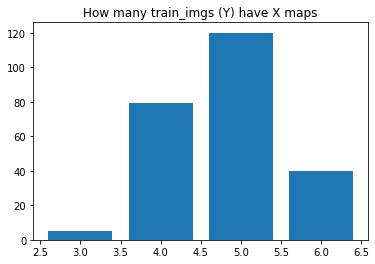

In [ ]:
occurrence_dict = Counter(occs)
plt.bar(occurrence_dict.keys(), occurrence_dict.values())

#formatting
plt.title("How many train_imgs (Y) have X maps")

plt.show()

Therefore:
- All train_imgs have at least 3 maps
- Most of them have 4,5,6 maps

# ***Results:***
- The maps/images vary in size, the dominant one remains 5120x5120
- All train_imgs have at least one map (usually 5, 4, 6)
- All maps_imgs of a train_img match in size
- In all map_dir except 6 there are maps: **s007_c137 and s007_c145** that do not have a respective image
  - The conclusion is to delete those maps, since we don't know what they refer to

# Combining the masks

Since we have 6 different mask for each training image, each one made by a particular doctor, we have decided to combine them through the use of the STAPLE algorithm, implemented in the SimpleITK library.

[STAPLE](https://pubmed.ncbi.nlm.nih.gov/15250643/) (Simultaneous Truth and Performance Level Estimation) is an algorithm used in medical image processing, specifically in the field of medical image segmentation. It is commonly used for combining multiple segmentation results obtained from different algorithms or observers to improve the overall accuracy and reliability of the segmentation.

The primary goal of STAPLE is to estimate the true segmentation of an image while taking into account the performance characteristics of the individual algorithms or observers. It assumes that each algorithm or observer has a certain level of performance, which may vary in terms of accuracy and reliability

In [ ]:
import multiprocessing
from multiprocessing import Pool
import os

import SimpleITK as sitk

In [ ]:
def staple(filename, input_dir, output_dir):
  ''''
  The algorithm iterates throught the various directories in input_dir searching for files named "filename".
  Then it makes an array of the masks and combines them through STAPLE implemented in SimpleITK.
  In case of undecidedLabel, valued 255, the code will take the data from the first mask to resolve the missing information
  '''
  print("processing {}...".format(filename))

  #list of current "filename" mask
  imgs = []

  #for loop to join the various masks named filename
  for p in input_dir:
      if os.path.isfile(os.path.join(p, filename)):
          imgs.append(sitk.ReadImage(os.path.join(p, filename)))

  #apply of the STAPLE algorithm, 255 for undecided labels
  result = sitk.MultiLabelSTAPLE(imgs, 255)

  #as a implementative choice I've decided to fill the undecided Labels with pixel values from the first mask
  p1_data = sitk.GetArrayFromImage(imgs[0])
  result_data = sitk.GetArrayFromImage(result)
  result_data[result_data == 255] = p1_data[result_data == 255]
  
  #changing mask labels from 0, 1, 3, 4, 5, 6 -> 0, 1, 2, 3, 4, 5
  result_data[result_data == 6] = 2

  result = sitk.GetImageFromArray(result_data)
  result.CopyInformation(imgs[0])
  sitk.WriteImage(result, os.path.join(output_dir, filename))

In [ ]:
output_maps = '/Staple Maps'


maskfiles = []
for i in maps_paths:
    maskfiles = maskfiles + os.listdir(i)
maskfiles = set(maskfiles)


processes = multiprocessing.cpu_count()

with Pool(processes=processes) as pool:
    results = [pool.apply_async(staple,
                                args=(maskfile, maps_paths,
                                      output_maps))
                for maskfile in maskfiles]
    _ = [_.get() for _ in results]
print("Done")

processing s005_c017.png...processing s002_c033.png...

processing s003_c055.png...
processing s005_c045.png...
processing s005_c033.png...
processing s002_c067.png...
processing s006_c004.png...
processing s001_c109.png...
processing s002_c030.png...
processing s007_c014.png...
processing s003_c056.png...
processing s002_c074.png...
processing s002_c002.png...
processing s005_c159.png...
processing s005_c063.png...
processing s001_c146.png...
processing s001_c066.png...
processing s005_c112.png...
processing s001_c059.png...
processing s003_c136.png...
processing s001_c012.png...
processing s001_c005.png...
processing s001_c011.png...
processing s006_c142.png...
processing s006_c090.png...
processing s002_c081.png...
processing s002_c052.png...
processing s003_c044.png...
processing s007_c046.png...
processing s003_c045.png...
processing s005_c102.png...
processing s006_c089.png...
processing s005_c111.png...
processing s002_c140.png...
processing s006_c120.png...
processing s007_c002

# Comparison of the masks
Let's the the difference between the six masks and the one generated from the STAPLE algorithm 

In [ ]:
import os

# Checking for common filename in maps 

# Get the files in the first subdirectory
common_filename = set(os.listdir(maps_paths[0]))

# Find the files that have the same name in all subdirectories
for subdir in maps_paths[1:]:
    common_filename.intersection_update(os.listdir(subdir))

# Print the common files
print(list(common_filename))


['s006_c115.png', 's001_c041.png', 's007_c047.png', 's002_c009.png', 's006_c105.png', 's002_c080.png', 's005_c069.png', 's006_c084.png', 's007_c043.png', 's006_c011.png', 's007_c048.png', 's006_c129.png', 's001_c111.png', 's005_c041.png', 's006_c087.png', 's006_c125.png', 's005_c074.png', 's002_c033.png', 's006_c110.png', 's002_c052.png', 's002_c026.png', 's006_c155.png', 's006_c083.png', 's002_c042.png', 's001_c159.png', 's001_c005.png', 's003_c114.png', 's002_c140.png', 's005_c009.png', 's006_c120.png', 's007_c002.png', 's005_c097.png', 's001_c160.png', 's007_c044.png', 's001_c059.png', 's003_c046.png', 's003_c136.png', 's002_c017.png', 's005_c063.png', 's005_c140.png']


s005_c074.png


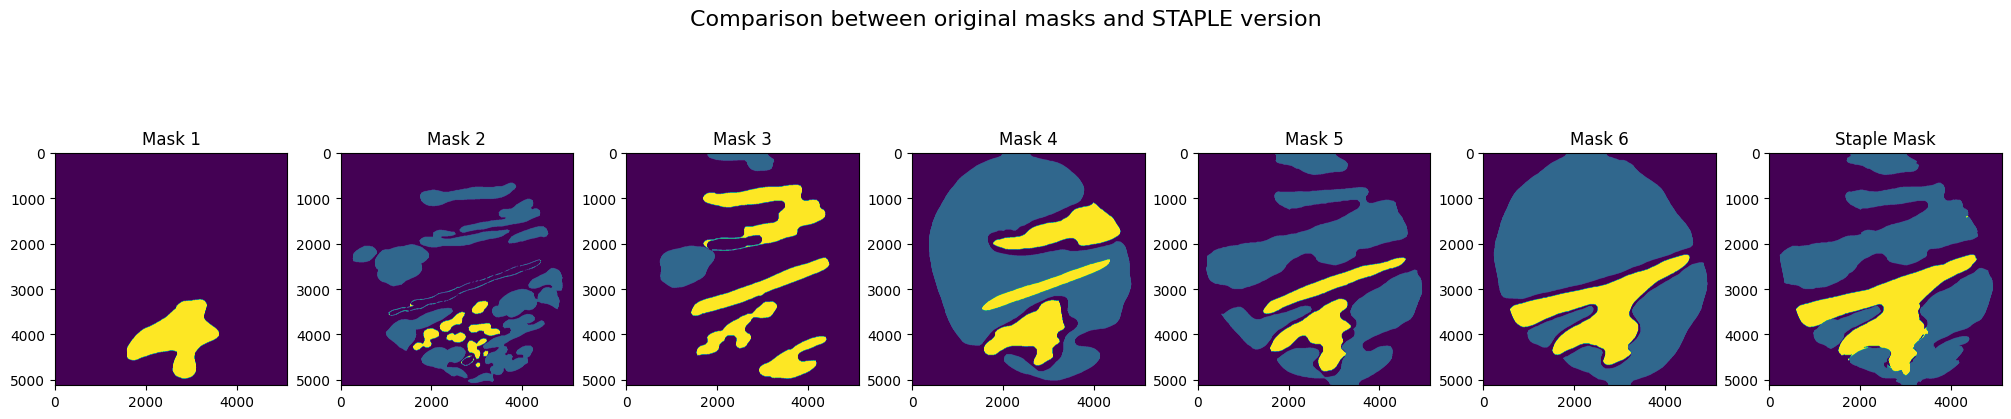

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

filename = random.choice(tuple(common_filename))
print(filename)
staple_maps = '/content/drive/MyDrive/Staple Maps'

# Load the original masks
masks = []
for maps in maps_paths:
    img = np.array(Image.open(os.path.join(maps, filename)))
    masks.append(img)


# Load the STAPLE version
staple_mask = np.array(Image.open(os.path.join(staple_maps, filename)))

fig, axs = plt.subplots(1, 7, figsize=(20, 5), constrained_layout=True)

for i, mask in enumerate(masks):
  ax = axs[i]
  ax.imshow(mask)
  ax.set_title(f"Mask {i+1}")

# Plot the STAPLE version
ax = axs[-1]
ax.imshow(staple_mask)
ax.set_title("Staple Mask")

# Set the title of the plot
fig.suptitle("Comparison between original masks and STAPLE version", fontsize=16)

# Show the plot
plt.show()


# Let's split the training dataset
I'll divide the 'Train Img' and 'Staple Maps' folder according to the following division
- 80% for training
- 20% for validation

In [10]:
import os
import shutil

dest = 'Dataset_overlapping/Original/'

# Set the source and destination directories
src_dir = 'Train Imgs'
mask_dir = 'Staple Maps'
train_dst = dest+'Train/imgs'
mask_dst = dest+ 'Train/masks'
valid_dst = dest+ 'Valid/imgs'
valid_mask_dst = dest+ 'Valid/masks'

# Create the destination directories if they don't exist
os.makedirs(train_dst, exist_ok=True)
os.makedirs(mask_dst, exist_ok=True)
os.makedirs(valid_dst, exist_ok=True)
os.makedirs(valid_mask_dst, exist_ok=True)

# Get the list of file names in the source directory
file_names = os.listdir(src_dir)

# Calculate the split point for train/valid sets
split_point = int(len(file_names) * 0.80)


# Copy files to train and mask directories
for file_name in file_names[:split_point]:
    src_path = os.path.join(src_dir, file_name)
    dst_path = os.path.join(train_dst, file_name)
    mask_path = os.path.join(mask_dir, file_name)
    mask_dst_path = os.path.join(mask_dst, file_name)
    shutil.copy(src_path, dst_path)
    shutil.copy(mask_path, mask_dst_path)

# Copy files to valid and valid_mask directories
for file_name in file_names[split_point:]:
    src_path = os.path.join(src_dir, file_name)
    dst_path = os.path.join(valid_dst, file_name)
    mask_path = os.path.join(mask_dir, file_name)
    mask_dst_path = os.path.join(valid_mask_dst, file_name)
    shutil.copy(src_path, dst_path)
    shutil.copy(mask_path, mask_dst_path)

In [12]:
# Let's see if it has worked!

num_elements = len(os.listdir('Dataset_overlapping/Original/Train/imgs'))
print("Number of elements in the folder:", num_elements)
num_elements = len(os.listdir('Dataset_overlapping/Original/Valid/imgs'))
print("Number of elements in the folder:", num_elements)

Number of elements in the folder: 195
Number of elements in the folder: 49


# Transforming Images
To fit server hardware we'll apply some transformation to our images. $$ \\ $$
Our first approach was to resize the images to 2048x2048 and divide them in 64 patches, overlapping at 25%;
however, we noticed the model could not learn from the labels due to the lack of context caused by the excessive fractioning of images. $$ \\ $$
At the end our strategy was to:
- Firstly resize the images to a 1024x1024 format
- Secondly, to divide them in patches of 512x512 with a 50% overlapping


### The naming convention is **sXXX_cYYY_vRC.png** where R and C stand respectively for row and column

In [24]:
def patchify(img, type, overlapping=False):
    '''Scales the image to 1024x1024 and divide in patches of 512x512'''

    overlapping_factor = 50/100 if overlapping == True else 1
    strides_step = int(512 * overlapping_factor)

    img = img.resize((1024, 1024), resample=Image.NEAREST)
    img_to_tensor = tf.convert_to_tensor(img)
    img_to_tensor = tf.expand_dims(img_to_tensor, axis=0)
    if type == 'mask':
        img_to_tensor = tf.expand_dims(img_to_tensor, axis=-1)


    patches = tf.image.extract_patches(images = img_to_tensor,
                                        sizes=[1, 512, 512, 1], 
                                        strides=[1, strides_step, strides_step, 1], 
                                        rates=[1, 1, 1, 1], 
                                        padding='VALID')
    
    return patches

In [23]:
def save_patches(patches, output_dir, filename, size, type):
    filename = os.path.splitext(filename)[0]
    '''Given a group of patches it saves them in output_dir with the naming convention "filename_vRC"'''
    for imgs in patches:    
        for r in range(size):
                for c in range(size):
                    if type == 'mask':
                        shape = (512,512)
                    if type == 'train':
                        shape = (512,512,3)
                    img = tf.reshape(imgs[r,c],shape=shape).numpy().astype("uint8")
                    img_pil = Image.fromarray(img)
                    name = filename + f'_v{r}{c}.png'
                    dir = os.path.join(output_dir, name)
                    img_pil.save(dir)
        

In [22]:
def join_patches(search_dir, file_dir, type, size=2):
    '''Given a file name in the format "sXXX_cYYY.png" the function search for all patches named "sXXX_cYYY_vRC.png" in "search_dir" and combine them into a full image. The "size"
    parameter refers to the number of rows and column.
    It only works if NO OVERLAPPING was applied'''

    dim = size*size
    file_dir = os.path.splitext(file_dir)[0]
    # Parse the file name to get the patch indices
    filename_parts = os.path.basename(file_dir).split("_")
    if len(filename_parts) != 2 or not filename_parts[0].startswith("s") or not filename_parts[1].startswith("c"):
        print(f"Error: Invalid file name format: {file_dir}")
        return
    
    s_idx = int(filename_parts[0][1:])
    c_idx = int(filename_parts[1][1:])
    
    # Load all patch images and combine them into a single image
    patch_images = []
    for r in range(size):
        for c in range(size):
            # Construct the filename for the patch image
            patch_filename = f"s{s_idx:03d}_c{c_idx:03d}_v{r}{c}.png"
            patch_filepath = os.path.join(search_dir, patch_filename)
            
            # Load the patch image and append it to the list of patch images
            patch_image = Image.open(patch_filepath)
            if type == 'mask':
                patch_image = patch_image.convert('RGB')
            
            patch_images.append(patch_image)
    
    # Check that we found all dim patch images
    if len(patch_images) != dim:
        print(f"Error: Found {len(patch_images)} patch images instead of 64")
        return
    
    # Combine the patch images into a single image
    patch_arrays = [np.array(img) for img in patch_images]
    patch_shape = patch_arrays[0].shape
    full_image = np.zeros((patch_shape[0]*size, patch_shape[1]*size, patch_shape[2]), dtype=np.uint8)
    for r in range(size):
        for c in range(size):
            full_image[r*patch_shape[0]:(r+1)*patch_shape[0], c*patch_shape[1]:(c+1)*patch_shape[1], :] = patch_arrays[r*size+c]

    full_image_pil = Image.fromarray(full_image)
    if type == 'mask':
        full_image_pil = full_image_pil.getchannel(0)
    return full_image_pil
    

## Now the following code will iterate each image in "Train Imgs" and "Staple Maps"

In [21]:
def transformToPatches(type, input_dir, output_dir, overlapping, index):
        for filename in os.listdir(input_dir):
            if not filename.endswith(".png"):
                continue
            
            # Load the image
            img_path = os.path.join(input_dir, filename)
            img = Image.open(img_path)
            
            # Patchify the image
            patches = patchify(img,type, overlapping)


            save_patches(patches, output_dir, filename, index, type)

In [5]:
train_patches_dir = 'Dataset_overlapping/Patches/'
input_dir = 'Dataset_overlapping/Original/'

In [18]:
transformToPatches('train',input_dir+'Train/imgs', train_patches_dir+'Train/imgs', True, 3)
transformToPatches('mask',input_dir+'Train/masks', train_patches_dir+'Train/masks', True, 3)

transformToPatches('train',input_dir+'Valid/imgs', train_patches_dir+'Valid/imgs', True, 3)
transformToPatches('mask',input_dir+'Valid/masks', train_patches_dir+'Valid/masks', True, 3)

In [19]:
num_elements = len(os.listdir('Dataset_overlapping/Patches/Train/imgs'))
print("Number of elements in the folder:", num_elements)
num_elements = len(os.listdir('Dataset_overlapping/Patches/Valid/imgs'))
print("Number of elements in the folder:", num_elements)

Number of elements in the folder: 1755
Number of elements in the folder: 441


## Comparison between reconstruced patch images and originals

s003_c097.png


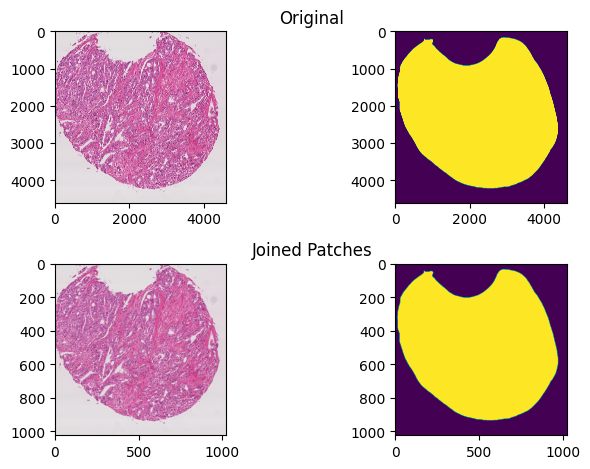

In [17]:
import random

path = 'Dataset_overlapping/Original/Test'
patches_path = 'Dataset_overlapping/Patches/Test'

file_list = os.listdir(os.path.join(path, 'imgs'))
random_file = random.choice(file_list)
print(random_file)

original_train = Image.open(os.path.join(path, 'imgs', random_file))
original_mask = Image.open(os.path.join(path, 'masks', random_file))
patch_train = join_patches(os.path.join(patches_path, 'imgs'), random_file, 'train')
patch_mask = join_patches(os.path.join(patches_path, 'masks'), random_file, 'mask')


fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(original_train)
axs[0, 1].imshow(original_mask)
axs[1, 0].imshow(patch_train)
axs[1, 1].imshow(patch_mask)

axs[0, 0].set_title("Original", x = 1.5)
axs[1, 0].set_title("Joined Patches", x = 1.5)

plt.tight_layout()
plt.show()

# Defining functions for the data loading
Below some functions for the data generation and augmentation along with some code to adjust the data

In [113]:
import tensorflow as tf
import numpy as np

def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))

        for i in range(num_class):
            new_mask[mask == i,i] = 1
        mask = new_mask
        
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    return (img,mask)



def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "rgb",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (512,512),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**aug_dict)
    mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)


In [115]:
batch_size = 4

num_classes = 6

train_path = 'Dataset_overlapping/Patches/Train'
valid_path = 'Dataset_overlapping/Patches/Valid'

num_epochs = 30

steps_per_epoch = len(os.listdir('Dataset_overlapping/Patches/Train/imgs')) // batch_size
valid_steps = len(os.listdir('Dataset_overlapping/Patches/Valid/imgs')) // batch_size

data_gen_args = dict(shear_range=0.05,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode='reflect')

In [20]:
train_dataset = trainGenerator(batch_size, train_path, 'imgs','masks', data_gen_args, flag_multi_class= True, num_class=num_classes)
validation_dataset = trainGenerator(batch_size, valid_path, 'imgs', 'masks', data_gen_args, flag_multi_class= True, num_class=num_classes)

In [19]:
import os
num_elements = len(os.listdir(train_path+'/masks'))
print("Number of elements in the folder:", num_elements)
num_elements = len(os.listdir(train_path+'/imgs'))
print("Number of elements in the folder:", num_elements)

num_elements = len(os.listdir(valid_path+'/masks'))
print("Number of elements in the folder:", num_elements)
num_elements = len(os.listdir(valid_path+'/imgs'))
print("Number of elements in the folder:", num_elements)

print(steps_per_epoch)

Number of elements in the folder: 1755
Number of elements in the folder: 1755
Number of elements in the folder: 441
Number of elements in the folder: 441
438


In [11]:
import tensorflow as tf
import numpy as np

img, mask = next(iter(validation_dataset))
print(img.shape)
print(mask.shape)

Found 441 images belonging to 1 classes.
Found 441 images belonging to 1 classes.
(4, 512, 512, 3)
(4, 512, 512, 6)


## Building the Model
Now I'll use the [Segmentation Models](https://segmentation-models.readthedocs.io/en/latest/) library to use specific neural networks

In [2]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

## Choice of the architecture

After some research and tries, we opted for *EfficientNetB4* since it is the best compromise between performance and accuracy as showed in the following image which was taken from the original [paper](https://arxiv.org/pdf/1905.11946.pdf). 





<div>
<p align="center">
  <img src="Materiale/Screenshot%202023-05-12%20alle%2016.48.20.png" width="1000"/>
</p>

</div>

In [14]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=12288)])
  except RuntimeError as e:
    print(e)

## Loss choice

After various experiments to evaluate the impact of parameters in data augmentation, we focused on choosing the best possible loss function. $$ \\ $$ Being the class dataset not perfectly balanced, we believed that the CategoricalFocalLoss, which put more emphasis on less represented classes, combined with a Dice Loss, could be beneficial for the overall model performance. 
$$ \\ $$

### Difference between losses
**Categorical Cross-Entropy loss** is traditionally used in classification tasks. It quantifies the degree of uncertainty in the model’s predicted value for the variable. The sum of the entropies of all the probability estimates is the cross entropy.
$$ \\ $$

$$ \text{Entropy} = -p_ilog_b(p_i) \\ \\ \\ \\ \text{CrossEntropy} = - \Sigma_{i = 1}^{i=n} Y_i \ log_b(p_i) \\ \text{Where Y is the true label and p is the predicted probability.}$$ 

Class imbalance inherits bias in the process. The majority class examples will dominate the loss function and gradient descent, causing the weights to update in the direction of the model becoming more confident in predicting the majority class while putting less emphasis on the minority classes.

**Focal loss** focuses on the examples that the model gets wrong rather than the ones that it can confidently predict, ensuring that predictions on hard examples improve over time rather than becoming overly confident with easy ones. Focal loss achieves this through something called Down Weighting. Down weighting is a technique that reduces the influence of easy examples on the loss function, resulting in more attention being paid to hard examples. This technique can be implemented by adding a modulating factor to the Cross-Entropy loss.

$$ \text{FocalLoss} = - \Sigma_{i = 1}^{i=n} (i-p_i)^\gamma \ log_b(p_i) \\ \text{Where γ (Gamma) is the focusing parameter to be tuned using cross-validation} \\ \\$$
 
<div>
<p align="center">
  <img src="Materiale/1_zkWsCJPPtCKzkG1VdZ4atA.webp" width="500"/>
</p>

</div>


In the end, after some experiments with the *CategoricalFocalLoss*, the *DiceLoss*, and the combination of the two, with or without weights, the best overall performance was obtained with the standard *CategoricalCrossEntropy Loss*, since the class were not so imbalanced to justify using other losses.

In [ ]:
import segmentation_models as sm
from keras.layers import Input, Conv2D
from keras.models import Model
import numpy as np
import keras
import matplotlib.pyplot as plt

keras.backend.set_image_data_format('channels_last')

def create_model():
    model = sm.Unet("efficientnetb4", classes = num_classes, activation = 'softmax')


    total_loss = sm.losses.CategoricalCELoss()

    metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

    model.compile(
        'Adam',
        loss = total_loss,
        metrics= metrics,
    )

    return model

In [21]:
model = create_model()

callbacks = [
    keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/checkpoint/saveBestModel.h5', save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(),
]

history = model.fit(train_dataset, steps_per_epoch=steps_per_epoch, 
    epochs=num_epochs, 
    callbacks=callbacks, 
    validation_data = validation_dataset,
    validation_steps = valid_steps
    )

model.save('/content/drive/MyDrive/Save/saveBestModelbest.h5')


Found 1755 images belonging to 1 classes.
Found 1755 images belonging to 1 classes.
Epoch 1/30
438/438 [==============================] - ETA: 0s - loss: 0.1635 - iou_score: 0.5181 - f1-score: 0.5769Found 441 images belonging to 1 classes.
Found 441 images belonging to 1 classes.
438/438 [==============================] - 465s 813ms/step - loss: 0.1635 - iou_score: 0.5181 - f1-score: 0.5769 - val_loss: 0.1812 - val_iou_score: 0.5243 - val_f1-score: 0.5752 - lr: 0.0010
Epoch 2/30
438/438 [==============================] - 349s 787ms/step - loss: 0.1398 - iou_score: 0.5698 - f1-score: 0.6395 - val_loss: 0.2607 - val_iou_score: 0.5688 - val_f1-score: 0.6282 - lr: 0.0010
Epoch 3/30
438/438 [==============================] - 352s 805ms/step - loss: 0.1287 - iou_score: 0.5969 - f1-score: 0.6701 - val_loss: 0.0795 - val_iou_score: 0.7251 - val_f1-score: 0.7738 - lr: 0.0010
Epoch 4/30
438/438 [==============================] - 375s 856ms/step - loss: 0.1228 - iou_score: 0.6122 - f1-score: 0.68

## Plotting the training history

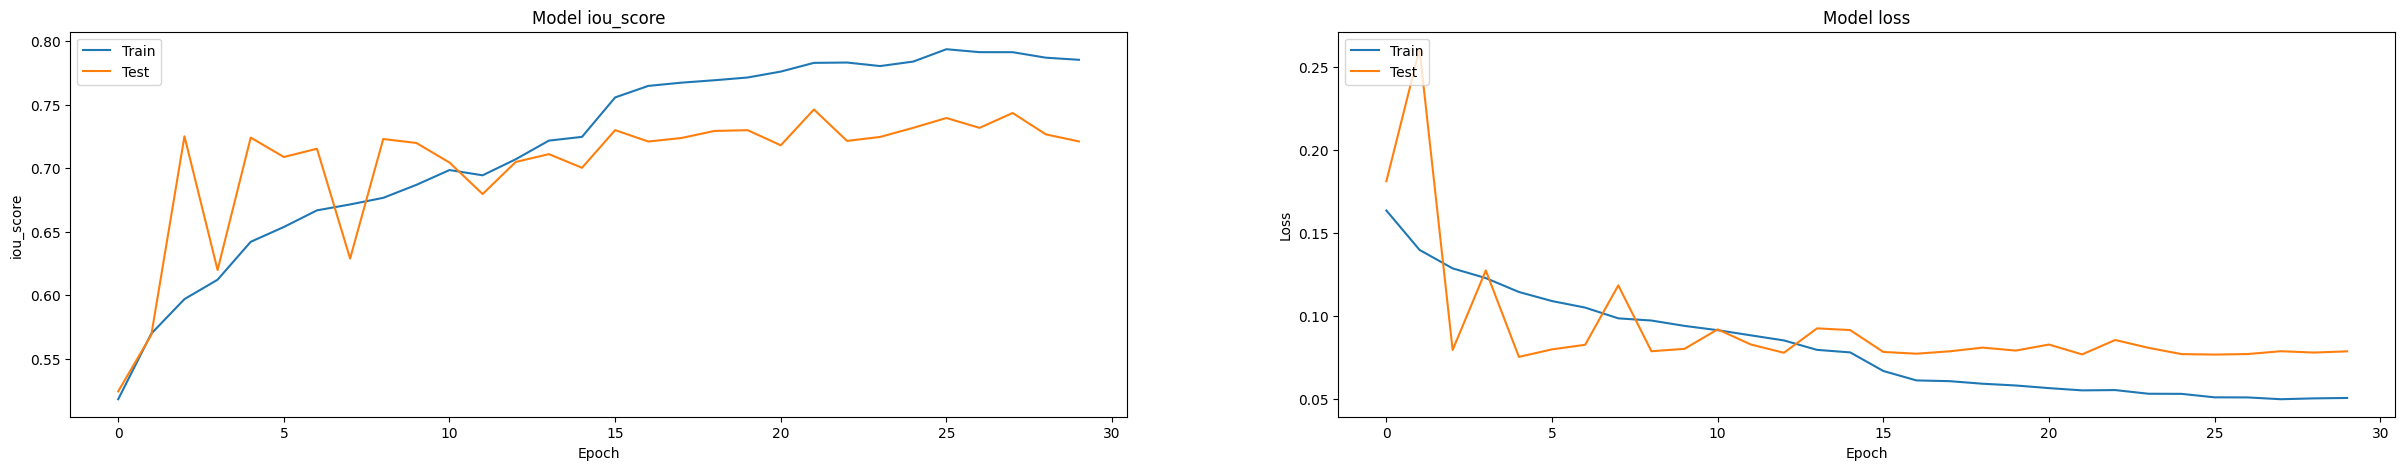

In [22]:
import matplotlib.pylab as plt

# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Evaluation the model

The following code is to predict the patches of a patient and recombine them through a smoothing algorithm. Below, it is showed a comparison between the original and the expected image

In [7]:

def ConvertFromOneHotEncoded(one_hot_images):
    '''
    This function converts one-hot-encoded images back to the original format
    '''
    images = []

    N = one_hot_images.shape[1]


    # Iterate over the one-hot encoded images in the list
    for one_hot_image in one_hot_images:

        # Initialize the image array with all elements set to 0
        image = np.zeros((N, N), dtype=np.uint8)

        # Iterate over the rows and columns of the one-hot encoded image
        for i in range(N):
            for j in range(N):
                # Get the index of the element with value 1 in the one-hot encoded image
                pixel_value = np.argmax(one_hot_image[i, j])
                # Set the corresponding element in the image to the index
                image[i, j] = pixel_value

        # Add the image to the list
        images.append(image)

    return np.array(images)


The following code was taken from the following Github and adapted to our project. It aims at joining predicted patches in a smoothly way.

https://github.com/bnsreenu/python_for_microscopists/tree/master/229_smooth_predictions_by_blending_patches 

In [6]:
import numpy as np
import scipy.signal
from tqdm import tqdm

import gc


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    PLOT_PROGRESS = False
    # See end of file for the rest of the __main__.
else:
    PLOT_PROGRESS = False


def _spline_window(window_size, power=2):
    """
    Squared spline (power=2) window function:
    https://www.wolframalpha.com/input/?i=y%3Dx**2,+y%3D-(x-2)**2+%2B2,+y%3D(x-4)**2,+from+y+%3D+0+to+2
    """
    intersection = int(window_size/4)
    wind_outer = (abs(2*(scipy.signal.triang(window_size))) ** power)/2
    wind_outer[intersection:-intersection] = 0

    wind_inner = 1 - (abs(2*(scipy.signal.triang(window_size) - 1)) ** power)/2
    wind_inner[:intersection] = 0
    wind_inner[-intersection:] = 0

    wind = wind_inner + wind_outer
    wind = wind / np.average(wind)
    return wind


cached_2d_windows = dict()
def _window_2D(window_size, power=2):
    """
    Make a 1D window function, then infer and return a 2D window function.
    Done with an augmentation, and self multiplication with its transpose.
    Could be generalized to more dimensions.
    """
    # Memoization
    global cached_2d_windows
    key = "{}_{}".format(window_size, power)
    if key in cached_2d_windows:
        wind = cached_2d_windows[key]
    else:
        wind = _spline_window(window_size, power)
        wind = np.expand_dims(np.expand_dims(wind, 1), 1)      #SREENI: Changed from 3, 3, to 1, 1 
        wind = wind * wind.transpose(1, 0, 2)
        if PLOT_PROGRESS:
            # For demo purpose, let's look once at the window:
            plt.imshow(wind[:, :, 0], cmap="viridis")
            plt.title("2D Windowing Function for a Smooth Blending of "
                      "Overlapping Patches")
            plt.show()
        cached_2d_windows[key] = wind
    return wind


def _pad_img(img, window_size, subdivisions):
    """
    Add borders to img for a "valid" border pattern according to "window_size" and
    "subdivisions".
    Image is an np array of shape (x, y, nb_channels).
    """
    aug = int(round(window_size * (1 - 1.0/subdivisions)))
    more_borders = ((aug, aug), (aug, aug), (0, 0))
    ret = np.pad(img, pad_width=more_borders, mode='reflect')
    # gc.collect()

    if PLOT_PROGRESS:
        # For demo purpose, let's look once at the window:
        plt.imshow(ret)
        plt.title("Padded Image for Using Tiled Prediction Patches\n"
                  "(notice the reflection effect on the padded borders)")
        plt.show()
    return ret


def _unpad_img(padded_img, window_size, subdivisions):
    """
    Undo what's done in the `_pad_img` function.
    Image is an np array of shape (x, y, nb_channels).
    """
    aug = int(round(window_size * (1 - 1.0/subdivisions)))
    ret = padded_img[
        aug:-aug,
        aug:-aug,
        :
    ]
    # gc.collect()
    return ret


def _rotate_mirror_do(im):
    """
    Duplicate an np array (image) of shape (x, y, nb_channels) 8 times, in order
    to have all the possible rotations and mirrors of that image that fits the
    possible 90 degrees rotations.
    It is the D_4 (D4) Dihedral group:
    https://en.wikipedia.org/wiki/Dihedral_group
    """
    mirrs = []
    mirrs.append(np.array(im))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
    im = np.array(im)[:, ::-1]
    mirrs.append(np.array(im))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
    return mirrs


def _rotate_mirror_undo(im_mirrs):
    """
    merges a list of 8 np arrays (images) of shape (x, y, nb_channels) generated
    from the `_rotate_mirror_do` function. Each images might have changed and
    merging them implies to rotated them back in order and average things out.
    It is the D_4 (D4) Dihedral group:
    https://en.wikipedia.org/wiki/Dihedral_group
    """
    origs = []
    origs.append(np.array(im_mirrs[0]))
    origs.append(np.rot90(np.array(im_mirrs[1]), axes=(0, 1), k=3))
    origs.append(np.rot90(np.array(im_mirrs[2]), axes=(0, 1), k=2))
    origs.append(np.rot90(np.array(im_mirrs[3]), axes=(0, 1), k=1))
    origs.append(np.array(im_mirrs[4])[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[5]), axes=(0, 1), k=3)[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[6]), axes=(0, 1), k=2)[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[7]), axes=(0, 1), k=1)[:, ::-1])
    return np.mean(origs, axis=0)


def _windowed_subdivs(padded_img, window_size, subdivisions, nb_classes, pred_func):
    """
    Create tiled overlapping patches.
    Returns:
        5D numpy array of shape = (
            nb_patches_along_X,
            nb_patches_along_Y,
            patches_resolution_along_X,
            patches_resolution_along_Y,
            nb_output_channels
        )
    Note:
        patches_resolution_along_X == patches_resolution_along_Y == window_size
    """
    WINDOW_SPLINE_2D = _window_2D(window_size=window_size, power=2)

    step = int(window_size/subdivisions)
    padx_len = padded_img.shape[0]
    pady_len = padded_img.shape[1]
    subdivs = []

    for i in range(0, padx_len-window_size+1, step):
        subdivs.append([])
        for j in range(0, pady_len-window_size+1, step):            #SREENI: Changed padx to pady (Bug in original code)
            patch = padded_img[i:i+window_size, j:j+window_size, :]
            subdivs[-1].append(patch)

    # Here, `gc.collect()` clears RAM between operations.
    # It should run faster if they are removed, if enough memory is available.
    gc.collect()
    subdivs = np.array(subdivs)
    gc.collect()
    a, b, c, d, e = subdivs.shape
    subdivs = subdivs.reshape(a * b, c, d, e)
    gc.collect()

    subdivs = pred_func(subdivs)
    gc.collect()
    subdivs = np.array([patch * WINDOW_SPLINE_2D for patch in subdivs])
    gc.collect()

    # Such 5D array:
    subdivs = subdivs.reshape(a, b, c, d, nb_classes)
    gc.collect()

    return subdivs


def _recreate_from_subdivs(subdivs, window_size, subdivisions, padded_out_shape):
    """
    Merge tiled overlapping patches smoothly.
    """
    step = int(window_size/subdivisions)
    padx_len = padded_out_shape[0]
    pady_len = padded_out_shape[1]

    y = np.zeros(padded_out_shape)

    a = 0
    for i in range(0, padx_len-window_size+1, step):
        b = 0
        for j in range(0, pady_len-window_size+1, step):                #SREENI: Changed padx to pady (Bug in original code)
            windowed_patch = subdivs[a, b]
            y[i:i+window_size, j:j+window_size] = y[i:i+window_size, j:j+window_size] + windowed_patch
            b += 1
        a += 1
    return y / (subdivisions ** 2)


def predict_img_with_smooth_windowing(input_img, window_size, subdivisions, nb_classes, pred_func):
    """
    Apply the `pred_func` function to square patches of the image, and overlap
    the predictions to merge them smoothly.
    See 6th, 7th and 8th idea here:
    http://blog.kaggle.com/2017/05/09/dstl-satellite-imagery-competition-3rd-place-winners-interview-vladimir-sergey/
    """
    pad = _pad_img(input_img, window_size, subdivisions)
    pads = _rotate_mirror_do(pad)

    res = []
    for pad in tqdm(pads):
        # For every rotation:
        sd = _windowed_subdivs(pad, window_size, subdivisions, nb_classes, pred_func)
        one_padded_result = _recreate_from_subdivs(
            sd, window_size, subdivisions,
            padded_out_shape=list(pad.shape[:-1])+[nb_classes])

        res.append(one_padded_result)

    # Merge after rotations:
    padded_results = _rotate_mirror_undo(res)

    prd = _unpad_img(padded_results, window_size, subdivisions)


    prd = prd[:input_img.shape[0], :input_img.shape[1], :]
    prd = ConvertFromOneHotEncoded(np.expand_dims(prd, 0))
    prd = prd[0]

    if PLOT_PROGRESS:
        plt.imshow(prd)
        plt.title("Smoothly Merged Patches that were Tiled Tighter")
        plt.show()
    return prd



Now let's show a comparison between all images and predicted ones

In [23]:
def generate_comparison(directory, output_dir, model, hasMasks = True):
    """Generates all plots of prediction"""
    imgs_path = os.path.join(directory, 'imgs')
    masks_path = os.path.join(directory, 'masks')

    filenames = os.listdir(imgs_path)

    for filename in filenames:
        img = Image.open(os.path.join(imgs_path, filename))
        img = img.resize((1024, 1024), resample=Image.NEAREST)
        img = np.array(img)
        img = img / 255

        if(hasMasks):
            mask = Image.open(os.path.join(masks_path, filename))
            mask = mask.resize((1024, 1024), resample=Image.NEAREST)
            mask = np.array(mask)

        prediction = predict_img_with_smooth_windowing(input_img = img,
                                window_size = 512,
                                subdivisions= 2,
                                nb_classes= 6,
                                pred_func=(lambda img_batch_subdiv: np.round(model.predict((img_batch_subdiv))).astype(np.uint8)))

        if (hasMasks):
            fig, ax = plt.subplots(1, 3, figsize=(10,10))
            ax[0].imshow(img)
            ax[0].set_title("Image")
            ax[1].imshow(mask)
            ax[1].set_title("Mask")
            ax[2].imshow(prediction)
            ax[2].set_title("Predicted")
        else:
            fig, ax = plt.subplots(1, 2, figsize=(10,10))
            ax[0].imshow(img)
            ax[0].set_title("Image")
            ax[1].imshow(prediction)
            ax[1].set_title("prediction")

        plt.savefig(os.path.join(output_dir, filename[:-4]), bbox_inches='tight')
    

## Generation of all comparisons

First let's load the model with the best weights of the training

In [24]:
import tensorflow as tf
from keras.utils import custom_object_scope
import segmentation_models as sm

with custom_object_scope({'iou_score': sm.metrics.IOUScore(threshold=0.5), 'f1-score': sm.metrics.FScore(threshold=0.5)}):
    model = tf.keras.models.load_model('noRotCatCross.h5', compile=False)

In [ ]:
generate_comparison('Dataset_overlapping/Original/Valid', 'Prediction/Valid', model)

In [ ]:
generate_comparison('Dataset_overlapping/Original/Test', 'Prediction/Test', model, hasMasks=False)

# Now let's see some interesting cases borrowed from the folder
## Validation 

<p float="left">
  <img src="Prediction/Valid/s001_c012.png" width="500" />
  <img src="Prediction/Valid/s001_c039.png" width="500" /> 
  <img src="Prediction/Valid/s003_c055.png" width="500" />
</p>****

<p float="left">
  <img src="Prediction/Valid/s003_c080.png" width="500" />
  <img src="Prediction/Valid/s006_c129.png" width="500" /> 
  <img src="Prediction/Valid/s003_c136.png" width="500" />
</p>****

## Test
In this case we can't compare the to the original masks since the dataset doesn't provide them

<p float="left">
  <img src="Prediction/Test/slide001_core132.png" width="500" />
  <img src="Prediction/Test/slide001_core143.png" width="500" /> 
  <img src="Prediction/Test/slide002_core075.png" width="500" />
</p>****

<p float="left">
  <img src="Prediction/Test/slide002_core155.png" width="500" />
  <img src="Prediction/Test/slide005_core078.png" width="500" /> 
  <img src="Prediction/Test/slide005_core059.png" width="500" />
</p>****

# Evaluation of Segmentation Scores and Plotting Results
To evaluate the results of our patches rejoin algorithm, we decided to recalculate the F1 score and Jaccard Index(Iou) on the predicted 1024x1024 images. 

The F1-score and IoU (Intersection over Union) are widely used metrics for evaluating the performance of image segmentation models.

The F1-score considers both precision and recall. Precision measures the proportion of correctly predicted positive instances out of all positive predictions, while recall measures the proportion of correctly predicted positive instances out of all actual positive instances. A higher F1-score indicates a better balance between precision and recall.

On the other hand, IoU focuses on measuring the overlap between the predicted and ground truth masks. It calculates the ratio of the intersection area to the union area of the two masks. IoU provides insights into how well the model's predictions align with the ground truth, emphasizing the spatial accuracy of the segmentation.

We noticed an average increase in accuracy compared to the same calculated on the individual patches.
Overlapping images technique improves the accuracy of a neural network by providing redundant information, aiding in precise localization, enhancing contextual understanding, increasing robustness to noise and variability, and improving generalization. By capturing neighboring regions multiple times, the network can better capture fine-grained details, understand spatial relationships, handle variations in the data, and make more reliable predictions.

In [3]:
import numpy as np
from sklearn.metrics import f1_score

In [4]:
def calculate_f1_score(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    f1 = f1_score(y_true, y_pred)
    return f1


In [5]:
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou


In [27]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, jaccard_score

def evaluate_segmentation(masks_dir, predictions_dir):
    mask_files = os.listdir(masks_dir)
    prediction_files = os.listdir(predictions_dir)
    
    f1_scores = []
    ious = []
    
    for mask_file in mask_files:
        if mask_file.endswith('.png') or mask_file.endswith('.jpg'):
            mask_path = os.path.join(masks_dir, mask_file)
            prediction_file = mask_file
            prediction_path = os.path.join(predictions_dir, prediction_file)
            
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            prediction = cv2.imread(prediction_path, cv2.IMREAD_GRAYSCALE)
            
            mask = mask.flatten()
            prediction = prediction.flatten()
            
            f1 = f1_score(mask, prediction, average='micro')
            iou = jaccard_score(mask, prediction, average='micro')
            
            f1_scores.append(f1)
            ious.append(iou)
    
    # Plot the results
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(f1_scores, marker='o')
    plt.xlabel('Image Index')
    plt.ylabel('F1-score')
    plt.title('F1-score per Image')
    
    plt.subplot(1, 2, 2)
    plt.plot(ious, marker='o')
    plt.xlabel('Image Index')
    plt.ylabel('IoU')
    plt.title('IoU per Image')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate average values
    avg_f1 = np.mean(f1_scores)
    avg_iou = np.mean(ious)
    
    # Find the indices of the best and worst scores
    best_f1_idx = np.argmax(f1_scores)
    worst_f1_idx = np.argmin(f1_scores)
    best_iou_idx = np.argmax(ious)
    worst_iou_idx = np.argmin(ious)
    
    # Get the filenames of the best and worst scored images
    best_f1_file = mask_files[best_f1_idx]
    worst_f1_file = mask_files[worst_f1_idx]
    best_iou_file = mask_files[best_iou_idx]
    worst_iou_file = mask_files[worst_iou_idx]
    
    print("Average F1-score: {:.4f}".format(avg_f1))
    print("Average IoU: {:.4f}".format(avg_iou))
    print("Best F1-score: {:.4f} (Image: {})".format(f1_scores[best_f1_idx], best_f1_file))
    print("Worst F1-score: {:.4f} (Image: {})".format(f1_scores[worst_f1_idx], worst_f1_file))
    print("Best IoU: {:.4f} (Image: {})".format(ious[best_iou_idx], best_iou_file))
    print("Worst IoU: {:.4f} (Image: {})".format(ious[worst_iou_idx], worst_iou_file))


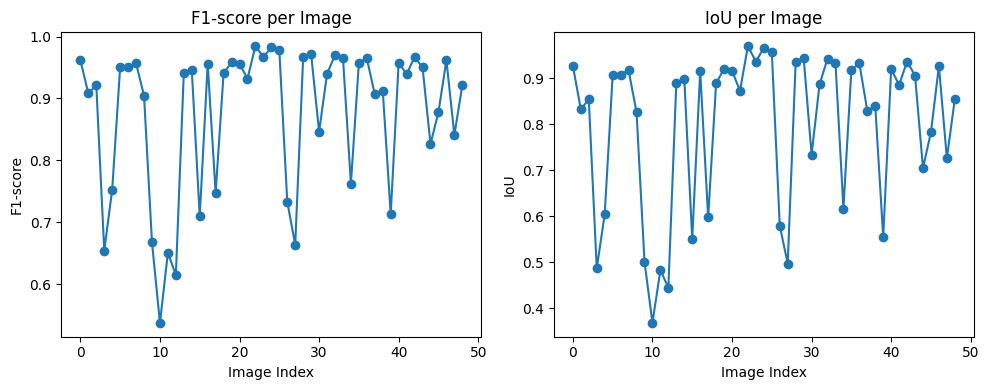

Average F1-score: 0.8765
Average IoU: 0.7981
Best F1-score: 0.9844 (Image: s006_c101.png)
Worst F1-score: 0.5378 (Image: s007_c048.png)
Best IoU: 0.9693 (Image: s006_c101.png)
Worst IoU: 0.3678 (Image: s007_c048.png)


In [28]:
masks_dir = 'Dataset_overlapping/Valid/masks'
predictions_dir = 'ValidPredict/'

evaluate_segmentation(masks_dir, predictions_dir)
